# Comparing variable and fixed interest rates for Kenny and O

First a comparison for 36 months, then 60 months

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# basic imports
import calc_tools as ct
import numpy as np

Perch option is the one from https://myperch.io/canada-interest-rate-forecast/#:~:text=The%20Bank%20of%20Canada%20is,before%20the%20end%20of%202023

Wowa is from https://wowa.ca/interest-rate-forecast

In [3]:
perch = [5.66, 6.09, 5.62, 5.2, 4.75, 4.31, 4.27, 3.96, 4.15, 3.95] + np.ones(10) * 0.89
perch_rates = np.concatenate([ct.generate_flat(perch_rate, 6) for perch_rate in perch])
print(perch)
print(perch_rates)
# 2023-06-30	5.66%
# 2023-12-31	6.09%
# 2024-06-30	5.62%
# 2024-12-31	5.20%
# 2025-06-30	4.75%
# 2025-12-31	4.31%
# 2026-06-30	4.27%
# 2026-12-31	3.96%
# 2027-06-30	4.15%
# 2027-12-31	3.95%
# 2028-06-30	4.28%
# 2028-12-31	4.19%

[6.55 6.98 6.51 6.09 5.64 5.2  5.16 4.85 5.04 4.84]
[6.55 6.55 6.55 6.55 6.55 6.55 6.98 6.98 6.98 6.98 6.98 6.98 6.51 6.51
 6.51 6.51 6.51 6.51 6.09 6.09 6.09 6.09 6.09 6.09 5.64 5.64 5.64 5.64
 5.64 5.64 5.2  5.2  5.2  5.2  5.2  5.2  5.16 5.16 5.16 5.16 5.16 5.16
 4.85 4.85 4.85 4.85 4.85 4.85 5.04 5.04 5.04 5.04 5.04 5.04 4.84 4.84
 4.84 4.84 4.84 4.84]


In [4]:
wowa = [6.7, 7.1, 7.1, 5.95, 5.95, 4.95, 4.45, 4.45, 4.45, 4.45] - np.ones(10) * 0.15
wowa_rates = np.concatenate([ct.generate_flat(wowa_rate, 6) for wowa_rate in wowa])
print(wowa)
print(wowa_rates)

[6.55 6.95 6.95 5.8  5.8  4.8  4.3  4.3  4.3  4.3 ]
[6.55 6.55 6.55 6.55 6.55 6.55 6.95 6.95 6.95 6.95 6.95 6.95 6.95 6.95
 6.95 6.95 6.95 6.95 5.8  5.8  5.8  5.8  5.8  5.8  5.8  5.8  5.8  5.8
 5.8  5.8  4.8  4.8  4.8  4.8  4.8  4.8  4.3  4.3  4.3  4.3  4.3  4.3
 4.3  4.3  4.3  4.3  4.3  4.3  4.3  4.3  4.3  4.3  4.3  4.3  4.3  4.3
 4.3  4.3  4.3  4.3 ]


Let's plot these to make sure they look sensible

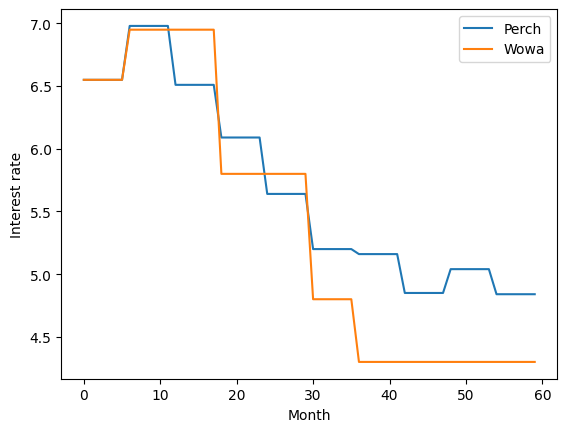

In [6]:
ct.plot_vs_time([perch_rates, wowa_rates], ['Perch', 'Wowa'], ylabel='Interest rate')

## Three year comparisons

Paying down 520746 in balance, on a 30 year loan, so 25 years left.

In [7]:
balance = 520746
fixed_rate_3y = 5.6
amort = 25

In [32]:
monthly_fixed_3y = ct.calculate_payment(balance, fixed_rate_3y, amort)
print(monthly_fixed_3y)

3208.97


Compare to variable rate payments, which has a much higher interest rate-- also 25 year amortization period remaining.

In [9]:
monthly_variable = ct.calculate_payment(balance, 6.55, amort, variable = True)
print(monthly_variable)

3532.4


Potential extra payments per month should be the difference here:

In [10]:
extra_3y = ct.generate_flat(monthly_variable - monthly_fixed_3y, months = 36)
print(extra_3y[0])

323.4300000000003


Let's calculate a few scenarios out now:

1) Fixed rate 
2) Fixed rate, with extra payments
3) Variable rate Perch 
4) Variable rate Wawa

In [13]:
fixed_3y = ct.generate_flat(fixed_rate_3y)

In [14]:
output_fixed_3y = ct.calculate_monthly_amortization(balance, fixed_3y, amort, 3, variable = False)
output_fixed_extra_3y = ct.calculate_monthly_amortization(balance, fixed_3y, amort, 3, extra_payments = extra_3y)

In [24]:
output_perch = ct.calculate_monthly_amortization(balance, perch_rates, amort, 5, variable = True)
output_perch_reduced = ct.reduce_output(output_perch, 36)
output_wawa = ct.calculate_monthly_amortization(balance, wowa_rates, amort, 5, variable = True)
output_wawa_reduced = ct.reduce_output(output_wawa, 36)

Magic! The hard part is done. Let's do some comparisons now. 

In [28]:
comparison_3y = [output_fixed_3y, output_fixed_extra_3y, output_perch_reduced, output_wawa_reduced]
labels_3y = [f'Fixed {fixed_rate_3y}', f'Fixed {fixed_rate_3y} with Extra', 'Variable 6.55, Perch', 'Variable 6.55, Wawa']

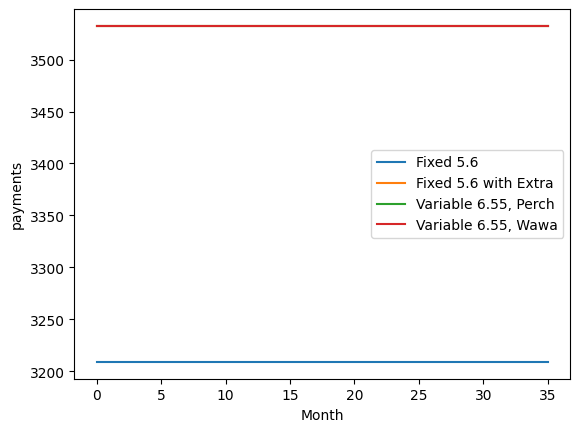

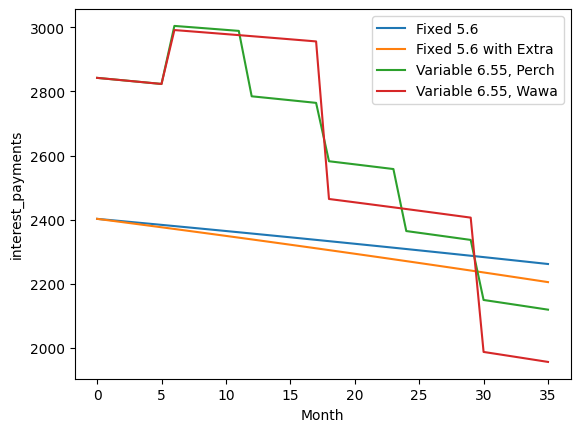

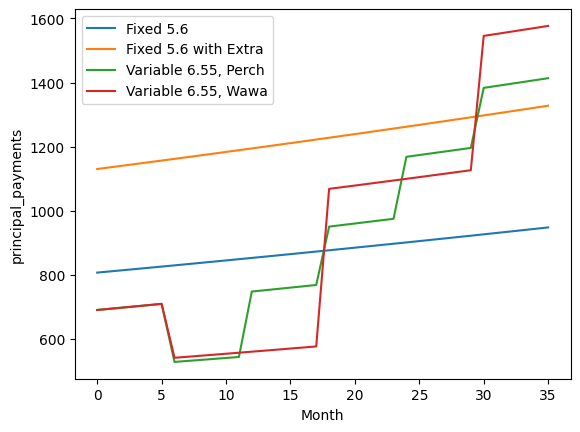

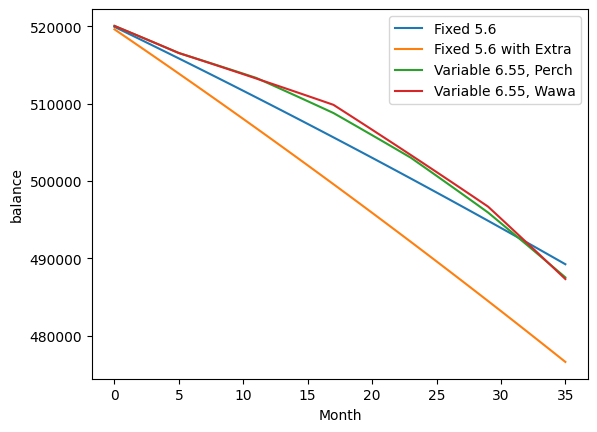

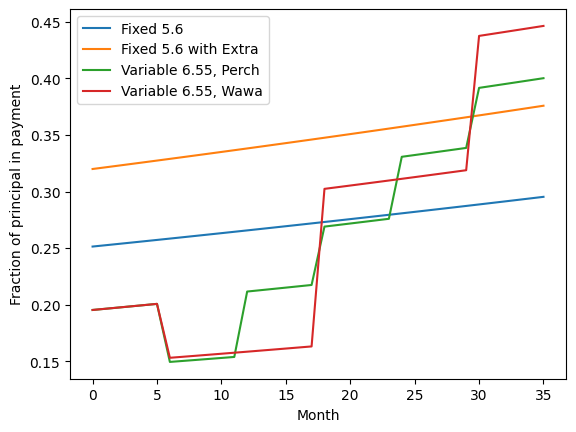

In [29]:
ct.make_plots_vs_time(comparison_3y, labels_3y)

For Fixed 5.6, your final balance is 489232.98. You paid 84009.9 in interest and 31513.02 in principal, for a principal fraction of 0.273

For Fixed 5.6 with Extra, your final balance is 476598.45. You paid 83018.85 in interest and 44147.55 in principal, for a principal fraction of 0.347

For Variable 6.55, Perch, your final balance is 487531.56. You paid 93951.96 in interest and 33214.44 in principal, for a principal fraction of 0.261

For Variable 6.55, Wawa, your final balance is 487318.75. You paid 93739.15 in interest and 33427.25 in principal, for a principal fraction of 0.263

Out of the above choices, Fixed 5.6 with Extra has the best final balance, at 476598.45. This gives 12634.53 of savings compared to the worst scenario, Fixed 5.6.


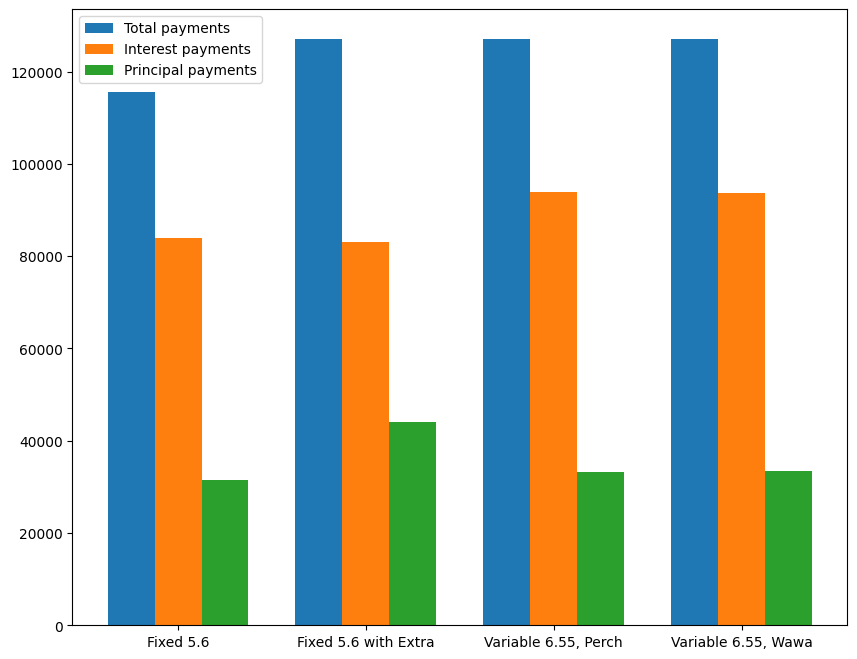

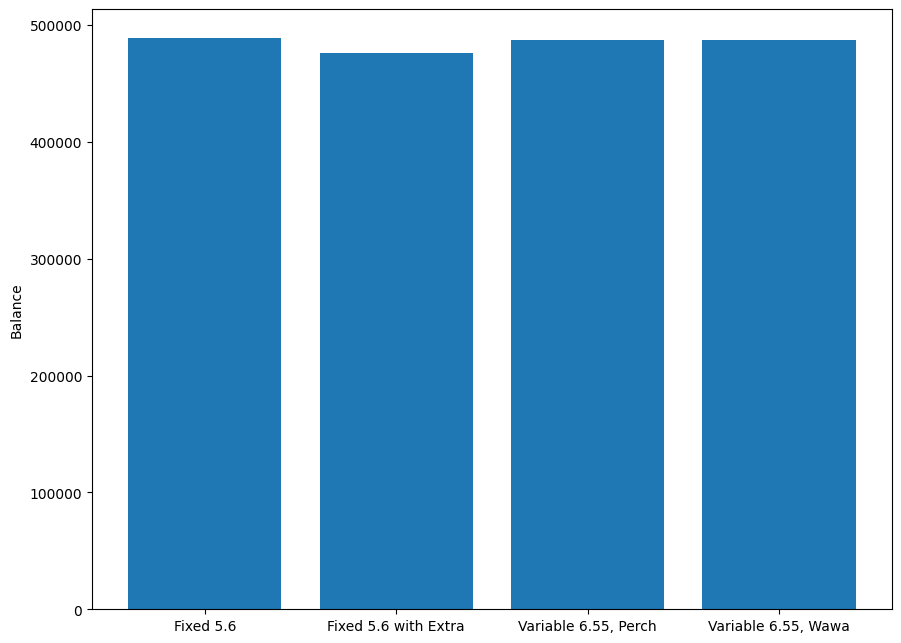

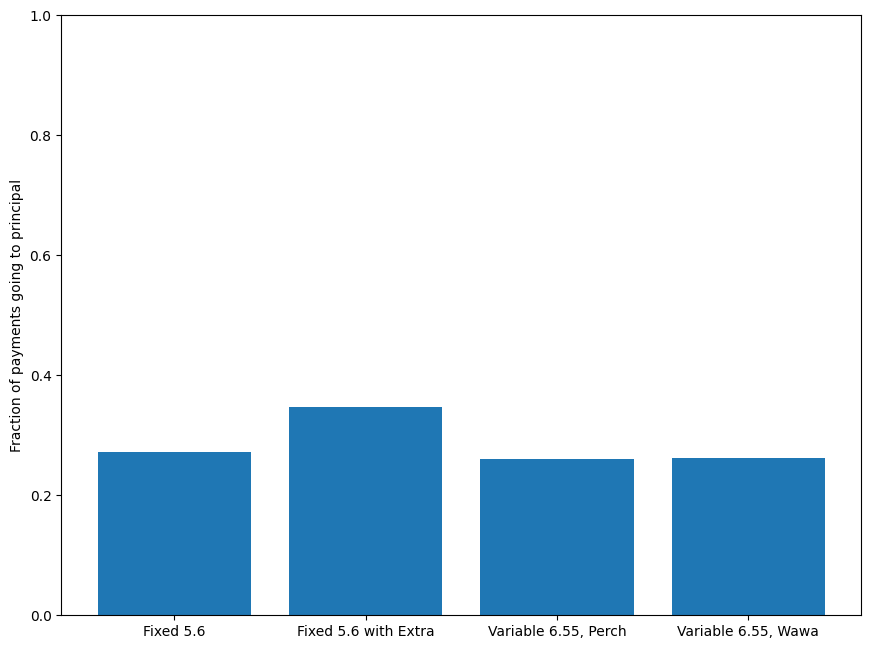

In [30]:
ct.make_summary(comparison_3y, labels_3y)

So in the 3y comparison: it's about a 11k swing towards paying less with the Fixed option (with extra payments). Doing the minimum payments on fixed 5.6 keeps 10k extra in your pocket.

## 5y comparison


Now do the same for all the 5y options!

In [31]:
fixed_rate_5y_broker = 5.09
fixed_rate_5y = 5.44

In [34]:
monthly_fixed_5y_broker = ct.calculate_payment(balance, fixed_rate_5y_broker, amort)
print(monthly_fixed_5y_broker)
monthly_fixed_5y = ct.calculate_payment(balance, fixed_rate_5y, amort) 
print(monthly_fixed_5y)

3055.42
3160.43


In [36]:
extra_5y_broker = ct.generate_flat(monthly_variable - monthly_fixed_5y_broker, months = 60)
extra_5y = ct.generate_flat(monthly_variable - monthly_fixed_5y, months = 60)
print(extra_5y_broker[0])
print(extra_5y[0])

476.98
371.97000000000025


Let's calculate a few scenarios out now:

1) Fixed rate from broker 
2) Fixed rate from broker, with extra payments
3) Fixed rate from RBC
4) Fixed rate from RBC, with extra payments
5) Variable rate Perch 
6) Variable rate Wawa

In [37]:
fixed_5y_broker = ct.generate_flat(fixed_rate_5y_broker)
fixed_5y = ct.generate_flat(fixed_rate_5y)

In [39]:
output_fixed_5y_broker = ct.calculate_monthly_amortization(balance, fixed_5y_broker, amort, 5, variable = False)
output_fixed_extra_5y_broker = ct.calculate_monthly_amortization(balance, fixed_5y_broker, amort, 5, extra_payments = extra_5y_broker)

In [40]:
output_fixed_5y = ct.calculate_monthly_amortization(balance, fixed_5y, amort, 5, variable = False)
output_fixed_extra_5y = ct.calculate_monthly_amortization(balance, fixed_5y, amort, 5, extra_payments = extra_5y)

In [46]:
comparison_5y = [output_fixed_5y_broker, output_fixed_extra_5y_broker, output_fixed_5y, output_fixed_extra_5y, output_perch, output_wawa]
labels_5y = [f'Fixed {fixed_rate_5y_broker}', f'Fixed {fixed_rate_5y_broker} w/ Extra', f'Fixed {fixed_rate_5y}', f'Fixed {fixed_rate_5y} w/ Extra', 'Perch', 'Wowa']

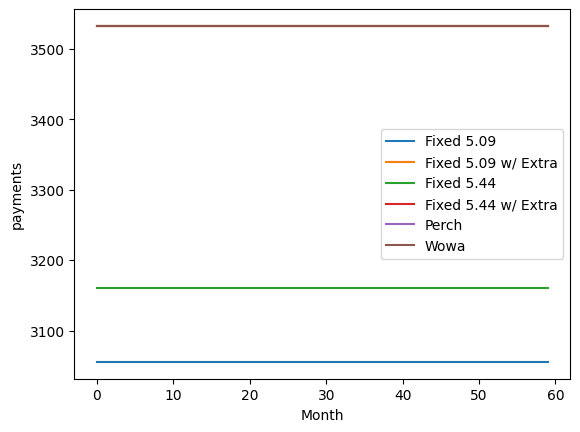

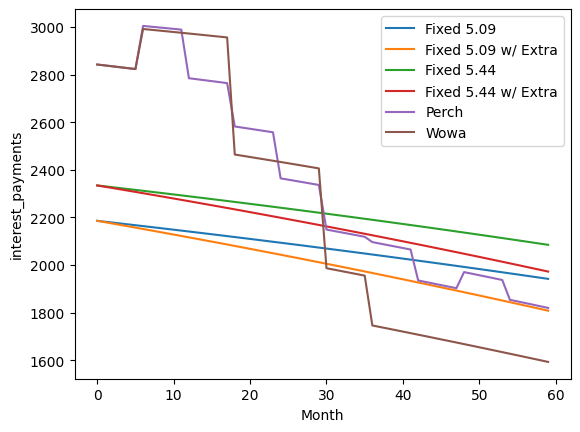

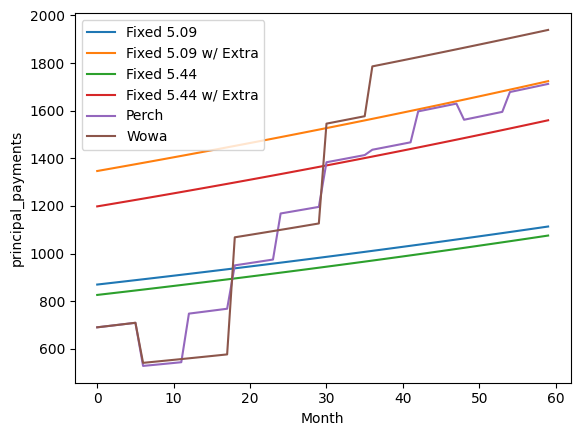

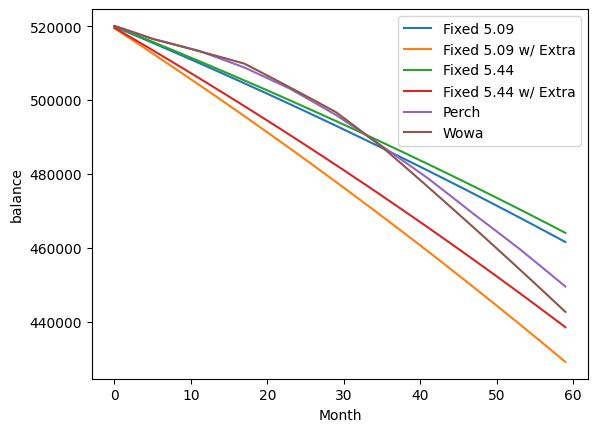

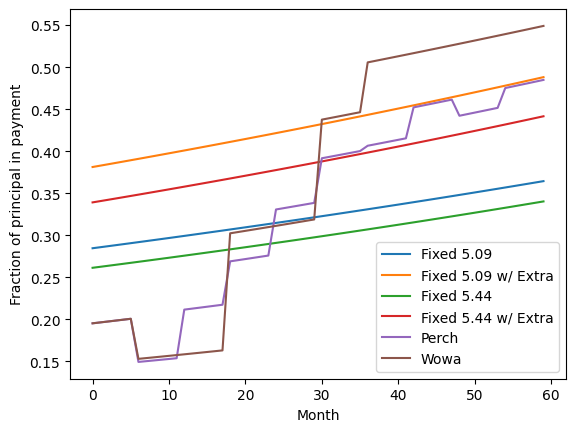

For Fixed 5.09, your final balance is 461548.6. You paid 124127.8 in interest and 59197.4 in principal, for a principal fraction of 0.323

For Fixed 5.09 w/ Extra, your final balance is 429080.57. You paid 120278.57 in interest and 91665.43 in principal, for a principal fraction of 0.432

For Fixed 5.44, your final balance is 464023.62. You paid 132903.42 in interest and 56722.38 in principal, for a principal fraction of 0.299

For Fixed 5.44 w/ Extra, your final balance is 438480.98. You paid 129678.98 in interest and 82265.02 in principal, for a principal fraction of 0.388

For Perch, your final balance is 449498.59. You paid 140696.59 in interest and 71247.41 in principal, for a principal fraction of 0.336

For Wowa, your final balance is 442636.75. You paid 133834.75 in interest and 78109.25 in principal, for a principal fraction of 0.369

Out of the above choices, Fixed 5.09 w/ Extra has the best final balance, at 429080.57. This gives 34943.05 of savings compared to the worst sce

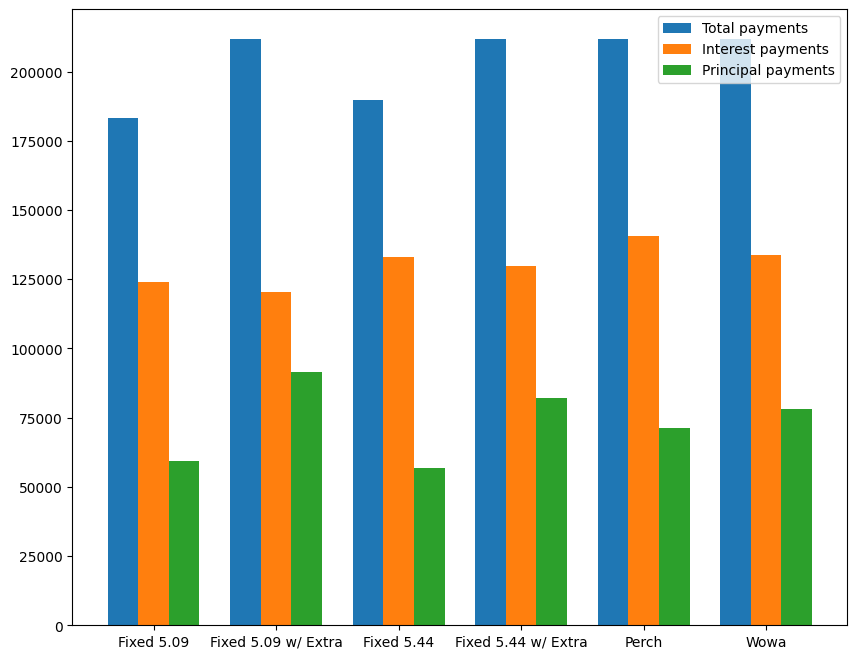

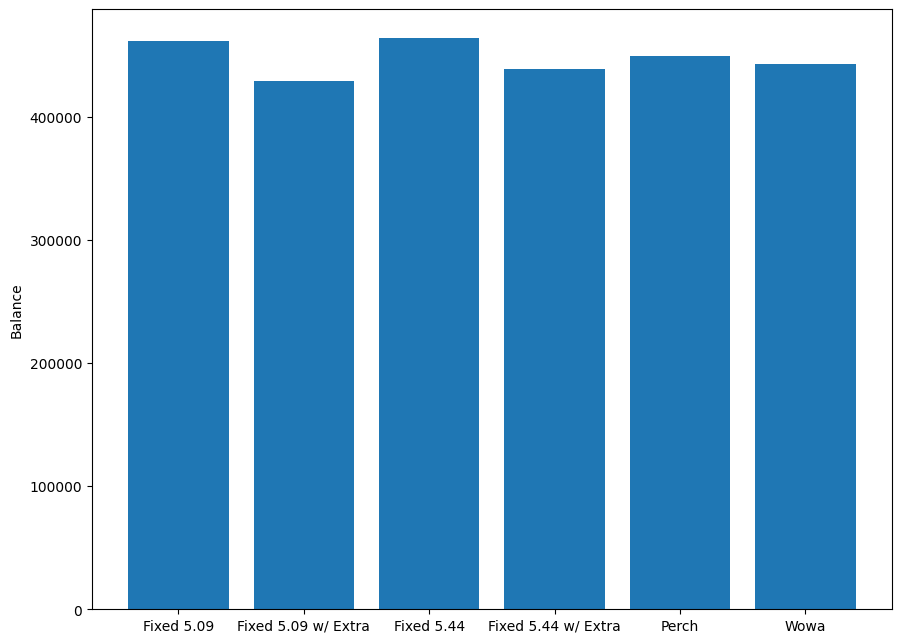

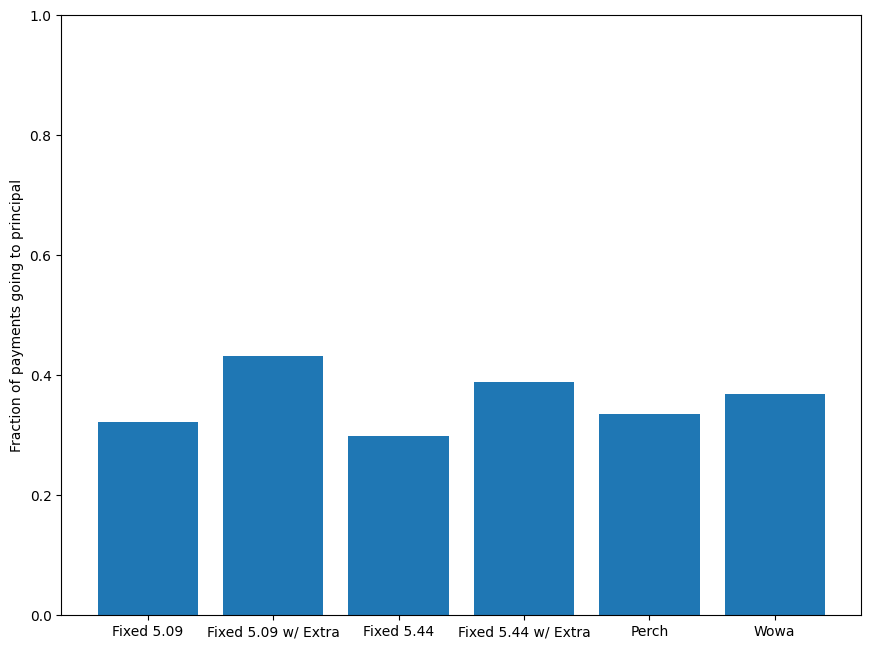

In [47]:
ct.make_plots_vs_time(comparison_5y, labels_5y)
ct.make_summary(comparison_5y, labels_5y)

In this case, the "Fixed 5.09 with Extra" option beats the Perch by 20k and the Wowa by 14k. If you don't add the extra payments, there's about 16k of savings compared to Perch, and net 27k in your pocket extra (the difference between these numbers if that the variable pays 11k more in interest, and 16k more in priciple).

The difference between 5.09 and 5.44 comes out to about 9500. So that brings the Variable closer, but the 5 year fixed is still "better". But the uncertainty increases-- it's very hard to be confident that far out!

# Comparing 3y to 5y

This is a hard comparison to make. But just to show the numbers:

In [52]:
output_fixed_extra_5y_reduced = ct.reduce_output(output_fixed_extra_5y, 36)
output_fixed_extra_5y_broker_reduced = ct.reduce_output(output_fixed_extra_5y_broker, 36)

In [53]:
compare_35 = [output_fixed_extra_5y_reduced, output_fixed_extra_5y_broker_reduced, output_fixed_extra_3y]
label_35 = [f'Fixed {fixed_rate_5y}', f'Fixed {fixed_rate_5y_broker}', f'Fixed {fixed_rate_3y}']

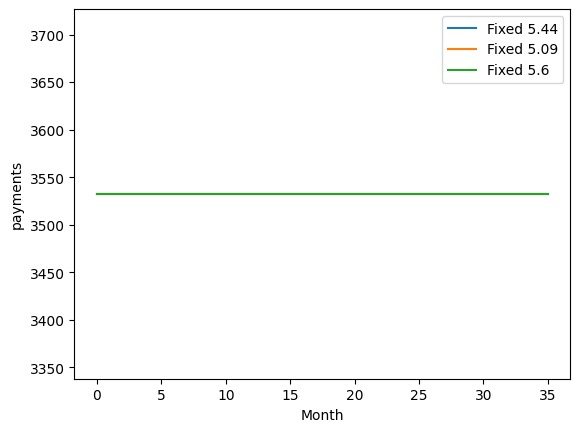

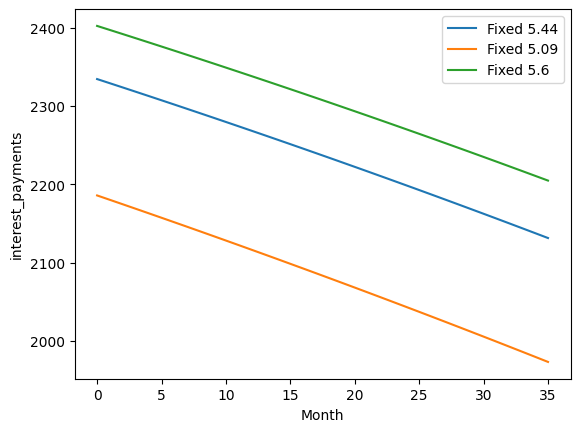

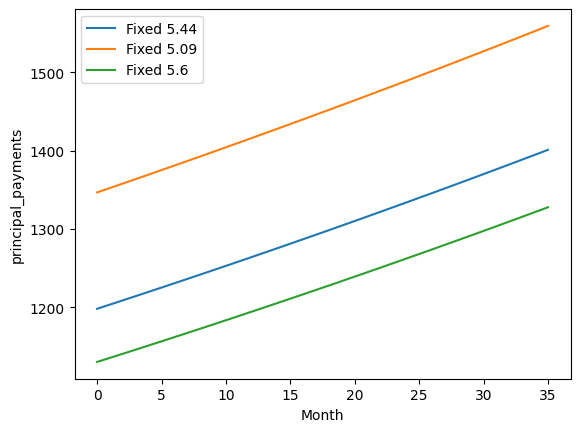

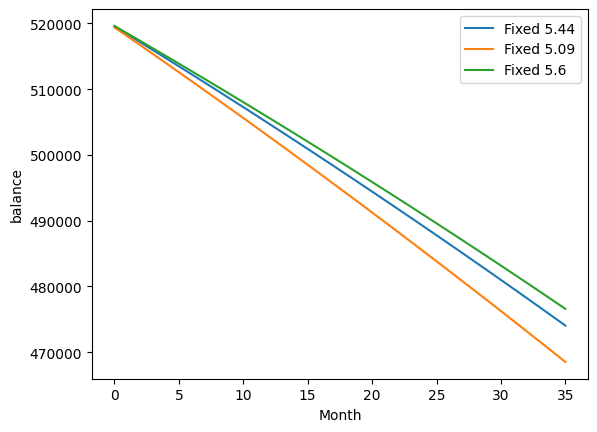

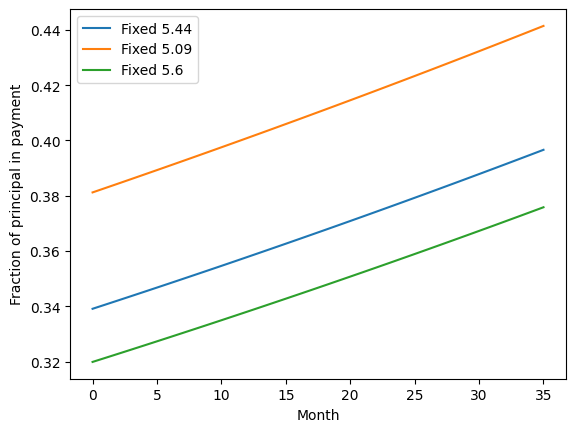

For Fixed 5.44, your final balance is 474056.09. You paid 80476.49 in interest and 46689.91 in principal, for a principal fraction of 0.367

For Fixed 5.09, your final balance is 468530.8. You paid 74951.2 in interest and 52215.2 in principal, for a principal fraction of 0.411

For Fixed 5.6, your final balance is 476598.45. You paid 83018.85 in interest and 44147.55 in principal, for a principal fraction of 0.347

Out of the above choices, Fixed 5.09 has the best final balance, at 468530.8. This gives 8067.65 of savings compared to the worst scenario, Fixed 5.6.


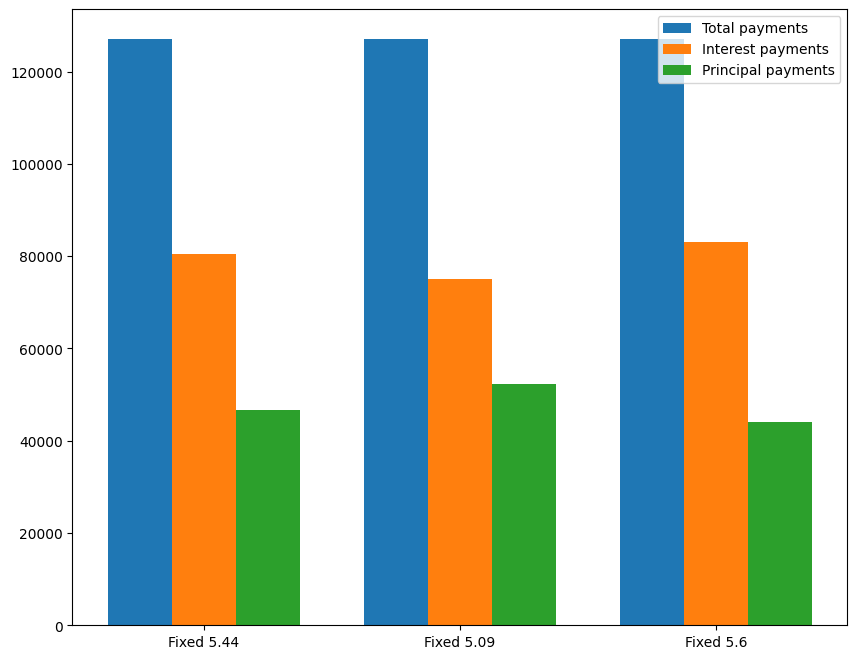

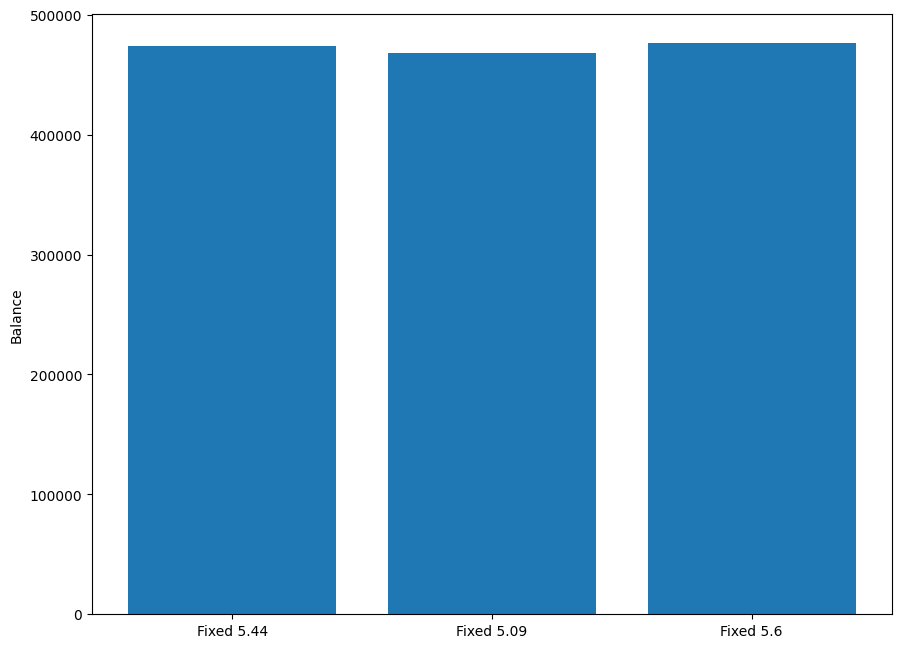

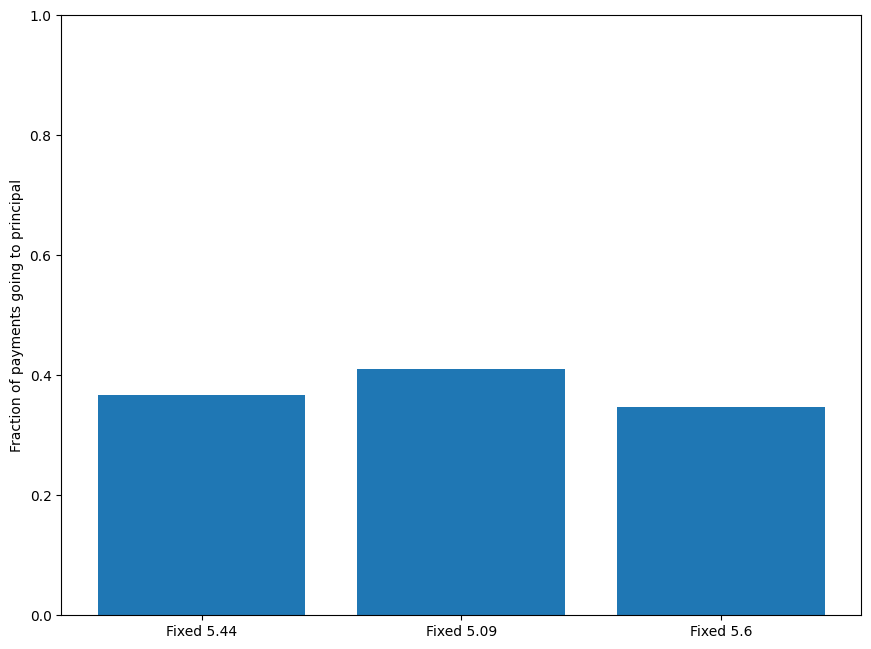

In [54]:
ct.make_plots_vs_time(compare_35, label_35)
ct.make_summary(compare_35, label_35)

Roughly, this means that after 3 years there is a 5k difference between 5.6 and 5.44-- but you have the chance to renew at that point at a presumably much lower rate. Given the predictions from Wawa and Perch, it seems *quite likely* that rates are around 5 in 3 years-- which will be low enough to make up time.

The 5.09 saves about 14k after 3 years compared to 5.6. So then you'd have to get a much, much better rate to make up the difference over the following two years-- it would need to be 4.3 or below. Wowa is predicting 4.3-- which would be the break-even point for this, so it would need to be lower than Wawa to have an advantage.

If you can get the 5.09, that looks like the best option at the moment...?